# Particle Swarm Optimization Algorithm (in Python!) 

First of all, let's import the libraries we'll need (remember we are using Python 3)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# import scipy as sp
# import time


%matplotlib notebook
plt.style.use('bmh')


We can define and plot the function we want to optimize:

<IPython.core.display.Javascript object>


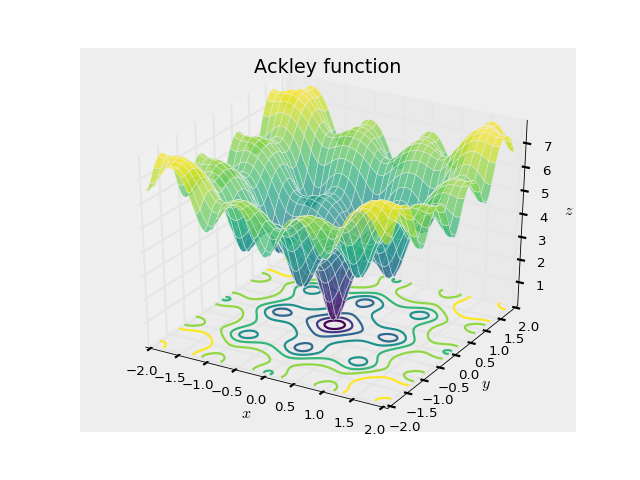

In [28]:
lo_b = -2  # lower bound
up_b = 2   # upper bound


nx_points = 100
ny_points = 100

x = np.linspace(lo_b, up_b, nx_points) # x coordinates of the grid
y = np.linspace(lo_b, up_b, ny_points) # y coordinates of the grid

XX, YY = np.meshgrid(x,y)
ZZ = np.zeros_like(XX)

def f(x):
    '''Ackley n-dimensional function
    x =  numpy array or list containing the independent variables
    
    returns y = objective function value
    '''
    x = np.array(x)  # converts list to numpy array
    n = x.size # n-dimensions of the vector 
    
    y = -20*np.exp(-0.2*(1/n*np.sum(x**2))**0.5) + \
        -np.exp(1/n*np.sum(np.cos(2*np.pi*x))) + 20 + np.exp(1);
        
    return y

for i in range(nx_points):
    for j in range(ny_points):
        ZZ[i,j] = f([XX[i,j], YY[i,j]])
        
# Note: we can have done the same operation by 
# using outer product (aka tensor product)
# instead of the doup_ble loop (see np.outer)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XX,YY,ZZ,
                rstride=3, cstride=3, alpha=0.7,
                cmap=plt.cm.viridis)

z_proj = ax.contour(XX,YY,ZZ,
                          zdir='z', offset=0,
                          cmap=plt.cm.viridis)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')


ax.set_title('Ackley function')

So we will be using the [Particle Swarm Optimization algorithm](https://en.wikipedia.org/wiki/Particle_swarm_optimization) to obtain the minumum (SPOILER!)
![PSO-2D](img/PSO_Example1.gif)

## PSO Initialization

In [29]:
n_particles = 20
n_iterations = 250

# Initialzing x postion of particles
x_particles = np.zeros((n_particles, n_iterations))
x_particles[:, 0] = np.random.uniform(lo_b, up_b, size=n_particles)

# Initialzing y postion of particles
y_particles = np.zeros((n_particles, n_iterations))
y_particles[:, 0] = np.random.uniform(lo_b, up_b, size=n_particles)

x_best_particles = np.copy(x_particles[:, 0])
y_best_particles = np.copy(y_particles[:, 0])

z_particles = np.zeros_like(y_particles)

for i in range(n_particles):
    z_particles[i, 0] = f([x_particles[i, 0],y_particles[i, 0]])
        
z_best_global = np.min(z_particles[:,0])
index_best_global = np.argmin(z_particles[:,0])

x_best_p_global = x_particles[index_best_global,0]
y_best_p_global = y_particles[index_best_global,0]

velocity_lo = lo_b-up_b 
velocity_up = up_b-lo_b 

v_particles = np.zeros((n_particles, n_iterations))
v_particles[:, 0] = 0.01*np.random.uniform(velocity_lo, velocity_up, size=n_particles)

<IPython.core.display.Javascript object>


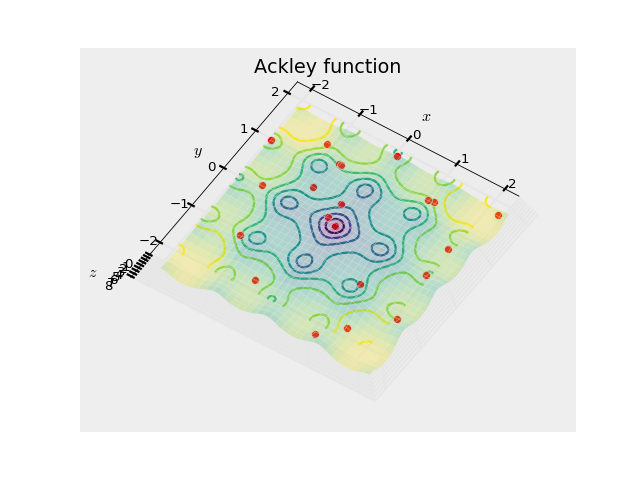

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(XX,YY,ZZ,
                rstride=3, cstride=3, alpha=0.3,
                cmap=plt.cm.viridis)

z_proj = ax.contour(XX,YY,ZZ,
                          zdir='z', offset=0,
                          cmap=plt.cm.viridis)

ax.scatter(x_particles, y_particles, z_particles,
           s=50, c='r',
           depthshade=False)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')


ax.set_title('Ackley function')



## PSO Algorithm

In [14]:
# PSO parameters
#from IPython.core.debugger import Tracer

omega = 1
phi_p = 0.01  # particle best weight
phi_g = 0.1  # global global weight

iteration = 1
while iteration <= n_iterations-1:
    for i in range(n_particles):
            x_p = x_particles[i, iteration-1]
            v_p = v_particles[i, iteration-1]
            x_best_p = x_best_particles[i]
            
            
            r_p = np.random.uniform(0, 1)
            r_g = np.random.uniform(0, 1)
            
            v_p_new = omega*v_p + \
                        phi_p*r_p*(x_best_p-x_p) + \
                        phi_g*r_g*(x_best_p_global-x_p)
            
            x_p_new = x_p + v_p_new
            
            if not lo_b <= x_p_new <= up_b: 
                x_p_new = x_p # ignore new position, it's out of the domain
            
            x_particles[i, iteration] = x_p_new
            
            y_p_best = f(x_best_p)
            y_p_new = f(x_p_new)
            
            if y_p_new < y_p_best:
                x_best_particles[i] = x_p_new
                
                y_p_best_global = f(x_best_p_global)
                if y_p_new < y_p_best_global:
                    x_best_p_global = x_p_new
            
    iteration = iteration + 1

In [15]:
x_best_p_global

-11.153853699061006

# Animation

In [16]:
from __future__ import print_function
import ipywidgets as widgets

In [17]:
y_particles = f(x_particles)

In [18]:
def plotPSO(i=0): #iteration
    plt.plot(x,y)
    plt.ylabel('$f(x) = \sin(x)+x\cos(2x)$')
    plt.xlabel('$x$')
    plt.title('Function to be optimized')
    plt.plot(x_particles[:,i],y_particles[:,i],'ro')

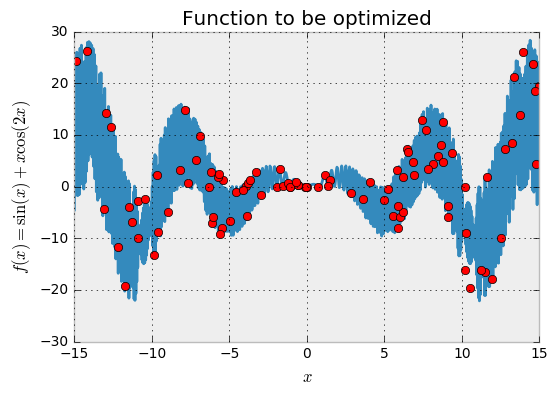

In [19]:
widgets.interact(plotPSO, i=(0,n_iterations-1))